__Titanic Kaggle Challenge__

Goal: for each passengerId in the test set, predict a 0 or 1 value for the survived variable

Metric: accuracy

Traning Set
- used to train machine learning model
- outcome is provided ('ground truth')
- model is based on passenger 'features'
- you can feature engineer to create new features

Test Set 
- how well your model performs on unseen data
- there is no ground truth, and must predict use

__Stage 1__

1. Download training and test set as .csv files
2. Load the datasets as pandas dataframes and combine into a single dataset
3. Understand basic information of variables
    - what variable represents
    - meaning of values
    - numerical summary
    - graphical distribution of values
4. Cleaning the data: handling missing data
    - discard all passengers with incomplete information
        - tiny fraction of values: impute with mean or median 
        - most of values are missing: discard
    - how to deal with outliers
5. Create a column to indicate whether a passenger has a rare title (Dr, MMe)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_set = pd.DataFrame.from_csv('train.csv')
test_set = pd.DataFrame.from_csv('test.csv')

train_set.head()

/home/kereeh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys
/home/kereeh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Understanding the Data__
    - survival: output
    - pclass: 1 = 1st, 2 = 2nd, 3 = 3rd
    - sex: sex
    - age: age in years
    - sibsp: number of siblings/spouses aboard the Titanic
    - parch: number of parents/children aboard the Titanic
    - ticket: ticket number
    - cabin: cabin number
    - embarked: part of embarkation; c = cherbourg, q = queenstown, s = southampton

In [2]:
#tells us about the dimensions of the data
#891 rows and 11 columns
train_set.shape

(891, 11)

In [3]:
#understanding the distribution of numerical values across samples
train_set.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#basic information of our dataset
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


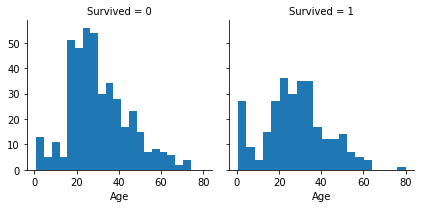

In [5]:
#plotting visualization of age vs survived 
age_plot = sns.FacetGrid(train_set, col = 'Survived')
age_plot.map(plt.hist, 'Age', bins = 20)

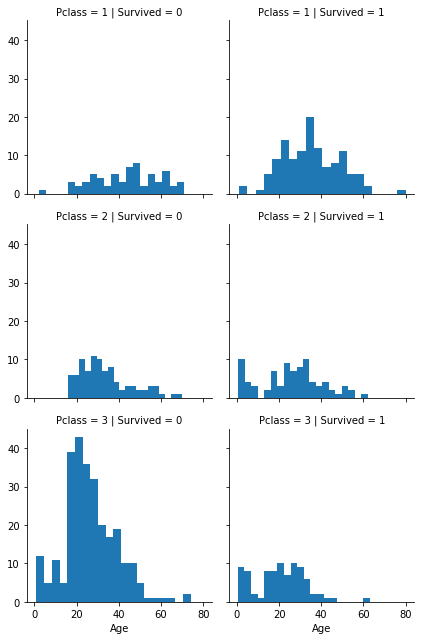

In [6]:
#looking at the distribution of survived passengers and their class types
class_plot = sns.FacetGrid(train_set, col = 'Survived', row = 'Pclass')
class_plot.map(plt.hist, 'Age', bins = 20)

In [7]:
#finding NAs in our dataset
train_set.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

687 out of 891 data points are missing from the Cabin column, it would be best to drop this value
177 out of 891 data points are missing from Age value - how should I replace this data? impute with mean or median?

In [8]:
#dropping cabin as irrelevant value
train_set = train_set.drop(columns = ['Cabin'])

In [9]:
#filling NA Age values with median age 
train_set['Age'] = train_set['Age'].fillna(train_set['Age'].median())

In [10]:
train_set['Title'] = train_set['Name'].str.extract(' ([A-za-z]+)\.', expand=False)

In [11]:
train_set_info = train_set.dtypes.reset_index()
train_set_info.columns = ["Column Name", "Column Type"]

train_set_info

,Column Name,Column Type
0,Survived,int64
1,Pclass,int64
2,Name,object
3,Sex,object
4,Age,float64
5,SibSp,int64
6,Parch,int64
7,Ticket,object
8,Fare,float64
9,Embarked,object


__Stage 2__

1. Data Preparation
    - Convert sex into binary factors: 0 and 1
    - Replace Embarked with Embark_S, Embark_C, and Embark_Q: to indicate the place where the passenger boarded the ship (i.e. Embark_S = 1, and Embark_C = 0, Embark_Q = 0) Use pandas.get_dummies() to help you
    - Feature scaling: scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() can help you with this)
    - Split the training data into  train set (80%) and validation set (20%). Training to build models, validation to evaluate them. Use (sklearn.model_selection.train_test_split())
    -  Create an indicator variable on whether a person paid for the ticket based off of titles? 
    
    
2. Building Models
    - linear regression, polynomial regression, logistic regression, and kNN
    - choose a model that is suitable and use corresponding sklearn classes to fit data
    
3. Evaluate the models
    - cross validation (show precisions)
    - confusion matrix, precision, and recall
    - precision and recall tradeoff
    - ROC curve and show AUC
  

In [12]:
train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [13]:
#convert sex into binary factors 0 and 1
train_set['Sex'] = train_set['Sex'].map( {'female': 1, 'male': 0}).astype(int)

train_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Mr


In [42]:
#get dummies and replacing column headers
dummies = pd.get_dummies(train_set['Embarked'])

dummies.columns = (['Embarked_C', 'Embarked_Q', 'Embarked_S'])

In [38]:
#concatenating dummies with original dataframe
train_set = pd.concat([train_set, dummies], axis=1)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [46]:
#dropping some irrelevant values for cleaner data
#name, since Title is extracted
#ticket since it doesn't seem to be helpful, and embarked because reshaped data

train_set = train_set.drop(columns = ['Name', 'Ticket', 'Embarked'])

In [50]:
#Feature scaling: scale each variable so that it has zero mean and unit 
#variance (sklearn.preprocessing.StandardScaler() can help you with this)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#only scale age and fare since those are the interval variables
#how about sibsp and parch?



In [53]:
#Split the training data into train set (80%) and validation set (20%). 
#Training to build models, validation to evaluate them. 
#Use (sklearn.model_selection.train_test_split())

from sklearn.model_selection import train_test_split

train, validation = train_test_split(train_set, test_size = 0.2)


In [ ]:
#Create an indicator variable on whether a person paid 
#for the ticket based off of titles?


In [ ]:
2. Building Models
    - linear regression, polynomial regression, logistic regression, and kNN
    - choose a model that is suitable and use corresponding sklearn classes to fit data

In [ ]:
3. Evaluate the models
    - cross validation (show precisions)
    - confusion matrix, precision, and recall
    - precision and recall tradeoff
    - ROC curve and show AUC
  

__Stage 3__
1. Model Fine-Tuning
    - pick one model that looks promising and perform grid search and random search on its hyperparameters to fine-tune the model. choose a proper scoring parameter from http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
2. Evaluate on Test Set
    - evaluate your system on validation set
    - compare performance on training and validation set

3. Submit results to Kaggle.com